# COMP20230 Assignment 2 - Brian Manning


In this notebook you will find the following classes:

    - nodeLinkedList: Node which stores the data and pointer to the next node
    - myLinkedList: Linked List implemented using nodeLinkedLists
    - Queue: Queue class implemented using lists
    - Stack: Stack class implemented using lists
    - QueueLL: Queue class implemented using Linked Lists
    - StackLL: Stack class implemented using Linked Lists
       
I have also implemented one real world example for each of myLinkedList, Queue & Stack which show how these data structures could be used in practice.

Each of the classes have been fully unit tested to ensure they implement the functionality correctly.

Below you can see a UML diagram of all of the data structures I have implemented in this assignment.
![](classes.png)

In [170]:
!pipreqs --force .

INFO: Successfully saved requirements file in .\requirements.txt


In [2]:
# testing
import unittest
from unittest.mock import patch, call
import sys

# printing output
from pprint import pprint

# plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# saving data
import pickle

# timing
from timeit import default_timer as timer

## Linked List
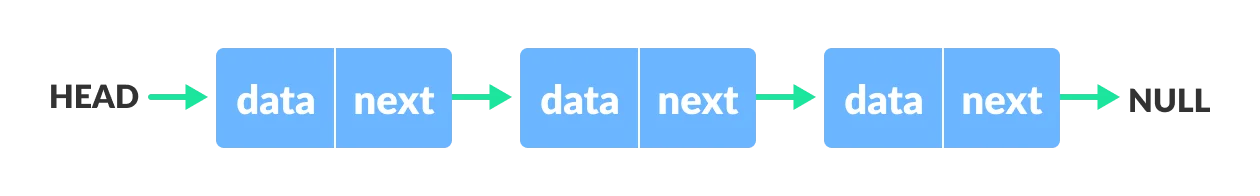
Below I have implement the Linked List data structure:
- I first used a node class to represent a single node in the linked list
- I then create a linked list class, name myLinkedList, which uses the node class and implements a number of methods to use the linked list.

I have implemented the following methods in the Linked List class:
- add_first: adds a node to the start of the linked list
- add_last: adds a node to the end of the linked list
- remove_first: remove the first element of the linked list
- remove_last: remove the last element of the linked list
- list_traversal: print out all the data stored in the linked list
- search: search for a given value in the linked list
- to_list: return a list of all the values stored in the linked list

### Implementation

In [3]:
class nodeLinkedList:
    def __init__(self, data=None, Next=None):
        self.data = data
        self.Next = Next

In [40]:
class myLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def add_first(self, data):
        """
        Add a node to the head of the linked list
        """
        new_node = nodeLinkedList(data)
        if self.head != None:
            new_node.Next = self.head
        else:
            self.tail = new_node
        self.head = new_node
        
        
    def add_last(self, data):
        """
        Add a node to the end of the linked list
        """
        if self.head == None:
            self.head = nodeLinkedList(data)
            self.tail = self.head
            return
        else:
            self.tail.Next = nodeLinkedList(data)
            self.tail = self.tail.Next

    def remove_first(self):
        """
        Remove the first node of the linked list
        """
        if self.head == None:
            pass
        elif self.head.Next == None:
            self.head = None
        else:
            first = self.head
            self.head = self.head.Next
            return first
    
    def remove_last(self):
        """
        Remove the last node of the linked list
        """
        if self.head == None:
            pass
        elif self.head.Next == None:
            self.head = None
        else:
            second_last = self.head
            while(second_last.Next.Next):
                second_last = second_last.Next
            second_last.Next = None
    
    def list_traversal(self):
        """
        Traverse the linked list, printing each node's value
        """
        if self.head == None:
            print("Empty Linked List")
        else:
            temp_node = self.head
            while temp_node != None:
                print(temp_node.data)
                temp_node = temp_node.Next
                
    def search(self, search_val):
        """
        Traverse the linked list, if a node with 
        data = value of the search_val return True
        """
        if self.head != None:
            temp_node = self.head
            while temp_node != None:
                if temp_node.data == search_val:
                    return True
                temp_node = temp_node.Next
        return False
    
    def to_list(self):
        """
        Traverse linked list returns list object with LL values
        """
        ll_list = []
        temp_node = self.head
        while temp_node != None:
            ll_list.append(temp_node.data)
            temp_node = temp_node.Next
        return ll_list
    
    def is_empty(self):
        """
        Return true if linked list is empty else false
        """
        return self.head == None

### Unit Testing the Linked List
Below I have tested each of the implemented methods in my linked list class.

In [5]:
class TestLinkedList(unittest.TestCase):
    def test_add_first(self):
        ll = myLinkedList()
        ll.add_first(1)
        self.assertEqual(ll.head.data, 1)
        
    def test_add_first_2(self):
        ll = myLinkedList()
        ll.add_first(2)
        ll.add_first(1)
        self.assertEqual(ll.head.data, 1)
        
    def test_add_last(self):
        ll = myLinkedList()
        ll.add_last(1)
        self.assertEqual(ll.head.data, 1)
        
    def test_add_last_2(self):
        ll = myLinkedList()
        ll.add_last(2)
        ll.add_last(1)
        self.assertEqual(ll.head.data, 2)
        
    def test_remove_first(self):
        ll = myLinkedList()
        ll.add_first(1)
        ll.remove_first()
        self.assertEqual(ll.head, None)
        
    def test_remove_first_2(self):
        ll = myLinkedList()
        ll.add_first(1)
        ll.add_first(2)
        ll.remove_first()
        self.assertEqual(ll.head.data, 1)

    def test_remove_last(self):
        ll = myLinkedList()
        ll.add_first(1)
        ll.remove_last()
        self.assertEqual(ll.head, None)
        
    def test_remove_last_2(self):
        ll = myLinkedList()
        ll.add_first(2)
        ll.add_first(1)
        ll.remove_last()
        self.assertEqual(ll.head.data, 1)
        
    def test_list_traversal(self):
        with patch('builtins.print') as mocked_print:
            ll = myLinkedList()
            ll.add_first(1)
            ll.list_traversal()
            self.assertEqual(mocked_print.mock_calls,[call(1)])
    
    def test_list_traversal_2(self):
        with patch('builtins.print') as mocked_print:
            ll = myLinkedList()
            ll.add_first(1)
            ll.add_first(1)
            ll.list_traversal()
            self.assertEqual(mocked_print.mock_calls,[call(1), call(1)])
            
    def test_search(self):
        ll = myLinkedList()
        ll.add_first(1)
        self.assertEqual(ll.search(1), True)
        
    def test_search_2(self):
        ll = myLinkedList()
        ll.add_first(1)
        self.assertEqual(ll.search(2), False)
        
    def test_to_list(self):
        ll = myLinkedList()
        ll.add_first(1)
        self.assertEqual(ll.to_list(), [1])
        
    def test_to_list_2(self):
        ll = myLinkedList()
        ll.add_first(1)
        ll.add_first(2)
        ll.add_first(3)
        ll.add_first(4)
        ll.add_first(5)
        self.assertEqual(ll.to_list(), [5,4,3,2,1])

In [6]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLinkedList)
unittest.TextTestRunner(verbosity=4, stream=sys.stderr).run(suite)

test_add_first (__main__.TestLinkedList) ... ok
test_add_first_2 (__main__.TestLinkedList) ... ok
test_add_last (__main__.TestLinkedList) ... ok
test_add_last_2 (__main__.TestLinkedList) ... ok
test_list_traversal (__main__.TestLinkedList) ... ok
test_list_traversal_2 (__main__.TestLinkedList) ... ok
test_remove_first (__main__.TestLinkedList) ... ok
test_remove_first_2 (__main__.TestLinkedList) ... ok
test_remove_last (__main__.TestLinkedList) ... ok
test_remove_last_2 (__main__.TestLinkedList) ... ok
test_search (__main__.TestLinkedList) ... ok
test_search_2 (__main__.TestLinkedList) ... ok
test_to_list (__main__.TestLinkedList) ... ok
test_to_list_2 (__main__.TestLinkedList) ... ok

----------------------------------------------------------------------
Ran 14 tests in 0.017s

OK


<unittest.runner.TextTestResult run=14 errors=0 failures=0>

### Testing out the Linked List
Below I will use the myLinkedList class to implement how a file system may split up a file in an operating system and store the memory locations using a linked list.

Imagine that we have some data - called original_data here which contains a string of characters. Our file system does not have storage to store this data linearly e.g. in an array so we must split it up into chunks. To demonstrate this I am simply splitting the data up into 2 character chunks in file_chunks. You can see below how the data has been split up.

In [42]:
original_data = "010203040506"
file_chunks =  [original_file[i:i+2] for i in range(0, len(original_file), 2)]
print(file_chunks)

['01', '02', '03', '04', '05', '06']


Now that we have the data we would like to store we must create our empty linked list and store each chunk as data in a node of that linked list.

In [43]:
file = myLinkedList()
file.list_traversal()

Empty Linked List


We will no add each chunk using a for loop and traverse the linked list each time to see the data stored in it.

In [44]:
for count, chunk in enumerate(file_chunks):
    file.add_last(chunk)
    print(f"Traversal {count}, Chunk Inserted {chunk}")
    file.list_traversal()
    print()

Traversal 0, Chunk Inserted 01
01

Traversal 1, Chunk Inserted 02
01
02

Traversal 2, Chunk Inserted 03
01
02
03

Traversal 3, Chunk Inserted 04
01
02
03
04

Traversal 4, Chunk Inserted 05
01
02
03
04
05

Traversal 5, Chunk Inserted 06
01
02
03
04
05
06



Above we can see how a file system may use a linked list to break up a file into chunks and store it in multiple locations. If we want to delete this file we must traverse through the file and remove node each time, finally ending up with an empty list.

In [45]:
while not file.is_empty():
    file.remove_last()
    file.list_traversal()
    print()

01
02
03
04
05

01
02
03
04

01
02
03

01
02

01

Empty Linked List



## Stack
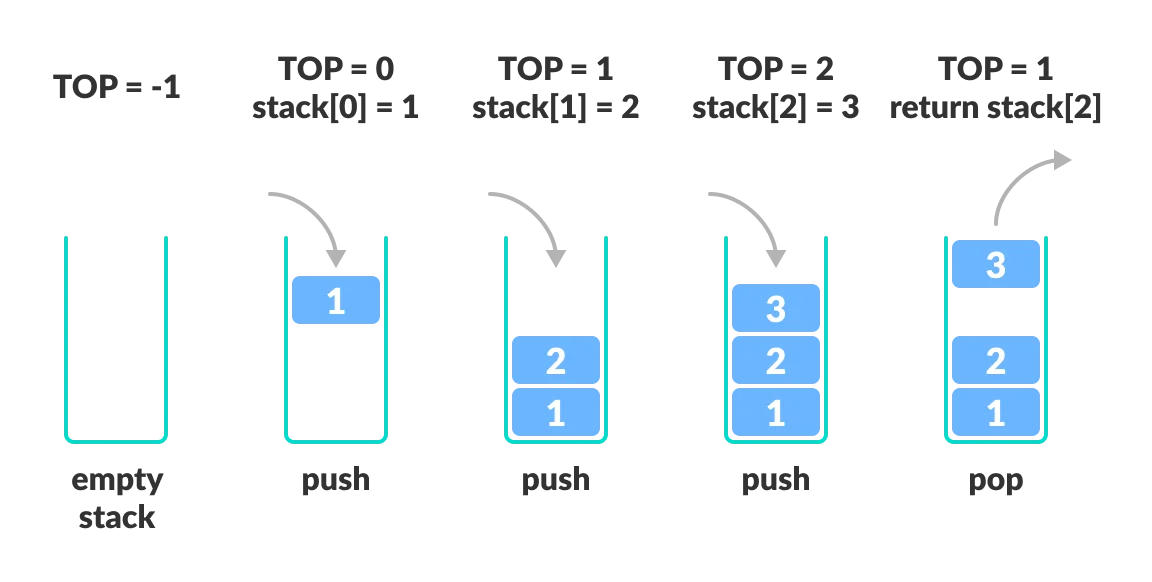
Below, I have implemented the Stack  data structure using a list.
The Stack ADT has the following methods:
- push: add element to end of stack
- pop: remove element from end of stack and return its value
- top: return the element at the end of the stack without removing
- is_empty: return whether the stack is empty or not

### Part II Question 1
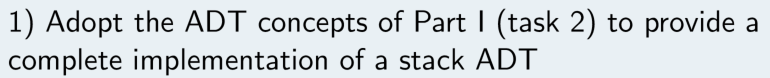

In [140]:
class Stack:
    def __init__(self):
        self.stack = []
        self.size = 0

    def push(self, data):
        """
        Push an element to the top of the stack
        """
        self.stack.append(data)
        self.size += 1
        return data

    def pop(self):
        """
        Remove an element from the stack and return its value
        """
        if self.is_empty():
            print("Stack is empty")
        else:
            popped_val = self.stack[-1]
            del self.stack[-1]
            self.size -= 1
            return popped_val
    
    def top(self):
        """
        Return the value of the first element in the stack
        """
        if self.is_empty():
            print("Stack is empty")
        else:
            return self.stack[-1]
        
    def is_empty(self):
        """
        Return true if stack is empty else false
        """
        return self.size == 0
    
    def get_size(self):
        """
        Return the current size of the stack
        """
        return self.size

### Unit Testing the Stack

In [145]:
class TestStack(unittest.TestCase):
    def test_push(self):
        s = Stack()
        s.push(1)
        self.assertEqual(s.stack, [1])

    def test_push_2(self):
        s = Stack()
        s.push(1)
        self.assertEqual(s.stack, [1])
        
    def test_pop(self):
        s = Stack()
        s.push(1)
        s.pop()
        self.assertEqual(s.stack, [])
        
    def test_pop_2(self):
        s = Stack()
        s.push(1)
        s.push(1)
        s.pop()
        self.assertEqual(s.stack, [1])
        
    def test_top(self):
        s = Stack()
        s.push(1)
        top_val = s.top()
        self.assertEqual(top_val, 1)

    def test_top_2(self):
        s = Stack()
        s.push(1)
        s.push(2)
        top_val = s.top()
        self.assertEqual(top_val, 2)
        
    def test_is_empty(self):
        s = Stack()
        is_empty = s.is_empty()
        self.assertEqual(is_empty, True)
        
    def test_is_empty_2(self):
        s = Stack()
        s.push(1)
        is_empty = s.is_empty()
        self.assertEqual(is_empty, False)
        
    def test_get_size_size(self):
        s = Stack()
        s.push(1)
        self.assertEqual(s.get_size(), 1)
        
    def test_get_size_size_2(self):
        s = Stack()
        self.assertEqual(s.get_size(), 0)

In [146]:
stack_suite = unittest.TestLoader().loadTestsFromTestCase(TestStack)
unittest.TextTestRunner(verbosity=4,stream=sys.stderr).run(stack_suite)

test_get_size_size (__main__.TestStack) ... ok
test_get_size_size_2 (__main__.TestStack) ... ok
test_is_empty (__main__.TestStack) ... ok
test_is_empty_2 (__main__.TestStack) ... ok
test_pop (__main__.TestStack) ... ok
test_pop_2 (__main__.TestStack) ... ok
test_push (__main__.TestStack) ... ok
test_push_2 (__main__.TestStack) ... ok
test_top (__main__.TestStack) ... ok
test_top_2 (__main__.TestStack) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.026s

OK


<unittest.runner.TextTestResult run=10 errors=0 failures=0>

### Testing out the Stack
Below we will test out the stack using an Undo/Redo example which may be used in a text editor.

First we will create both the undo_stack which will store operations which the user has just performed and the redo_stack which will store operations the user has just undoed.

In [58]:
undo_stack = Stack()
redo_stack = Stack()

Now we will push the following basic operations to the stack.

In [59]:
operations = ["Paste", "Cut", "Delete", "Paste"]

for operation in operations:
    undo_stack.push(operation)

Now let's say that the user would like to undo their last operation (the last paste operation in the operations list). We will perform the pop operation on the undo_stack which will remove the last operations from the stack and return its value and we will then push this operation to the redo stack.

In [60]:
redo_stack.push(undo_stack.pop())

'Paste'

After the following operations have been completed we can get an overview of both stacks by using the .stack variable.

In [62]:
print("Undo Stack",undo_stack.stack)
print("Redo Stack",redo_stack.stack)

Undo Stack ['Paste', 'Cut', 'Delete']
Redo Stack ['Paste']


We can see the final state of both stacks, the redo stack now has the paste operation which we undid and the undo stack has all of the other operations.

### Part II Question 2
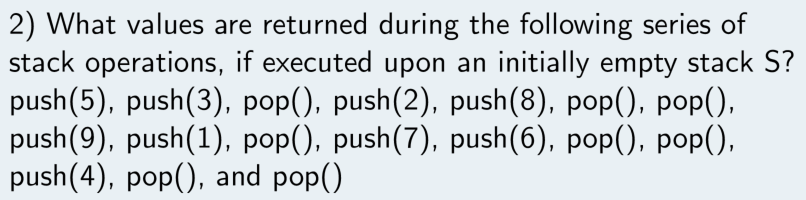

In [116]:
# Part II Question 2

# initialise an empty stack
s_2 = Stack()

# store the returned values from 
# the required operations in a list
stacked_returned = [
    s_2.push(5),
    s_2.push(3),
    s_2.pop(),
    s_2.push(2),
    s_2.push(8),
    s_2.pop(),
    s_2.pop(),
    s_2.push(9),
    s_2.push(1),
    s_2.pop(),
    s_2.push(7),
    s_2.push(6),
    s_2.pop(),
    s_2.pop(),
    s_2.push(4),
    s_2.pop(),
    s_2.pop()
]

print("Returned Values:", stacked_returned)

Returned Values: [5, 3, 3, 2, 8, 8, 2, 9, 1, 1, 7, 6, 6, 7, 4, 4, 9]


### Part II Question 3
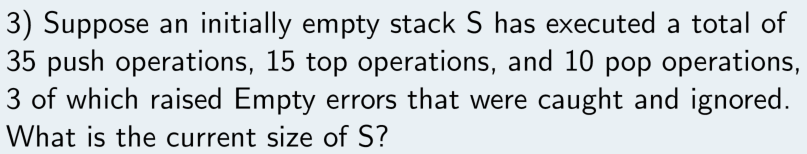

In [147]:
# Part II Question 3

# initialise an empty stack
s_3 = Stack()

# try to pop values when the Stack is empty
# these will each result in an error 
# which totals 3 errors
for i in range(3):
    s_3.pop()

# do the remaining operations required
for i in range(35):
    s_3.push(i)

# do the top operations
for i in range(15):
    s_3.top()

# do the remaing 7 pop operations
for i in range(7):
    s_3.pop()

print("\nCurrent Size", s_3.get_size()) 

Stack is empty
Stack is empty
Stack is empty

Current Size 28


## Queue ADT
Below I have implemented the Queue data structure.
The Queue ADT has the following methods:
- enqueue: add element to the end of the queue
- dequeue: remove element from the start of the queue and return its value
- is_empty: check if the queue is empty or not
- top: return the value at the start of the queue without removing it.

### Implementation: Part III Question 1
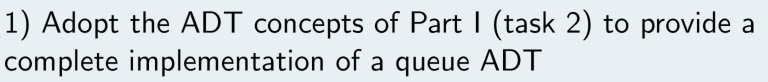

In [168]:
class Queue:
    def __init__(self):
        self.queue = []
        self.size = 0
        
    def enqueue(self, data):
        """
        Add element to the end of the queue
        """
        self.queue.append(data)
        self.size += 1
        return data
    
    def dequeue(self):
        """
        Remove element from the start of the queue and return its value
        """
        if self.is_empty():
            print("Queue is empty")
        else:
            return_val = self.queue[0]
            del self.queue[0]
            self.size -= 1
            return return_val
        
    def top(self):
        """
        Return the value of the element at the front of the queue
        """
        if self.is_empty():
            print("Queue is empty")
        else:
            return self.queue[0]
    
    def is_empty(self):
        """
        Return true if queue is empty else false
        """
        return self.size == 0
    

    def get_size(self):
        """
        Returns the size of the queue
        """
        return self.size

### Unit Testing the Stack

In [152]:
class TestQueue(unittest.TestCase):
    def test_enqueue(self):
        q = Queue()
        q.enqueue(1)
        self.assertEqual(q.queue, [1])

    def test_enqueue_2(self):
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.queue, [1, 2])    
    
    def test_dequeue(self):
        q = Queue()
        q.enqueue(1)
        q.dequeue()
        self.assertEqual(q.queue, [])
        
    def test_dequeue_2(self):
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        q.dequeue()
        self.assertEqual(q.queue, [2])
        
    def test_top(self):
        q = Queue()
        q.enqueue(1)
        self.assertEqual(q.top(), 1)
        
    def test_top_2(self):
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.top(), 1)
        
    def test_is_empty(self):
        q = Queue()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.is_empty(), False)
        
    def test_is_empty_2(self):
        q = Queue()
        q.enqueue(1)
        q.dequeue()
        self.assertEqual(q.is_empty(), True)

    def test_get_size(self):
        q = Queue()
        q.enqueue(1)
        self.assertEqual(q.get_size(), 1)

    def test_get_size_2(self):
        q = Queue()
        self.assertEqual(q.get_size(), 0)   

In [153]:
queue_suite = unittest.TestLoader().loadTestsFromTestCase(TestQueue)
unittest.TextTestRunner(verbosity=4,stream=sys.stderr).run(queue_suite)

test_dequeue (__main__.TestQueue) ... ok
test_dequeue_2 (__main__.TestQueue) ... ok
test_enqueue (__main__.TestQueue) ... ok
test_enqueue_2 (__main__.TestQueue) ... ok
test_get_size (__main__.TestQueue) ... ok
test_get_size_2 (__main__.TestQueue) ... ok
test_is_empty (__main__.TestQueue) ... ok
test_is_empty_2 (__main__.TestQueue) ... ok
test_top (__main__.TestQueue) ... ok
test_top_2 (__main__.TestQueue) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.025s

OK


<unittest.runner.TextTestResult run=10 errors=0 failures=0>

### Testing out the Queue
Below we will take a look at how the queue data structure could be used for process scheduling.

In [110]:
ready_queue = Queue()
wait_queue = Queue()

Initially, we will want to add processes to the job queue.

In [111]:
# add 3 processes to the queue
processes = ["P1", "P2", "P3"]

for process in processes:
    ready_queue.enqueue(process)

 We can now start executing these processes. But there is one problem - each process requires Input/Output functionality so they must be added to the wait queue. The I/O they require can only handle one process at once and it will take 2 seconds to complete.

In [112]:
import time
for i in range(3):
    # each process needs to go to the wait queue to perform I/O
    process_to_wait = ready_queue.dequeue()
    print(f"Input/Output needed, queueing in the wait queue: {process_to_wait}",end="\n\n")
    wait_queue.enqueue(process_to_wait)
    
    # I/O takes 2 seconds to run
    time.sleep(2)
    print("Current ready queue: ", ready_queue.queue)
    print("Current wait queue: ", wait_queue.queue,end="\n\n")

    # after I/O is complete we enqueue it back in the ready queue for execution
    process_to_execute = wait_queue.dequeue()
    print(f"Input/Output complete, queueing in the ready queue to be executed: {process_to_execute}",end="\n\n")
    ready_queue.enqueue(process_to_execute)
    print("Current ready queue: ", ready_queue.queue)
    print("Current wait queue: ", wait_queue.queue,end="\n\n")


Input/Output needed, queueing in the wait queue: P1

Current ready queue:  ['P2', 'P3']
Current wait queue:  ['P1']

Input/Output complete, queueing in the ready queue to be executed: P1

Current ready queue:  ['P2', 'P3', 'P1']
Current wait queue:  []

Input/Output needed, queueing in the wait queue: P2

Current ready queue:  ['P3', 'P1']
Current wait queue:  ['P2']

Input/Output complete, queueing in the ready queue to be executed: P2

Current ready queue:  ['P3', 'P1', 'P2']
Current wait queue:  []

Input/Output needed, queueing in the wait queue: P3

Current ready queue:  ['P1', 'P2']
Current wait queue:  ['P3']

Input/Output complete, queueing in the ready queue to be executed: P3

Current ready queue:  ['P1', 'P2', 'P3']
Current wait queue:  []



Once all process have completed I/O, we can now execute them. Please note in practice we could have started execution of P1 once P3 was added to the wait queue but here we wait until it is complete before starting this.

In [113]:
# once I/O is complete across all processes we can now execute them
while not ready_queue.is_empty():
    print("Executing:",ready_queue.dequeue())

Executing: P1
Executing: P2
Executing: P3


### Part III Question 2
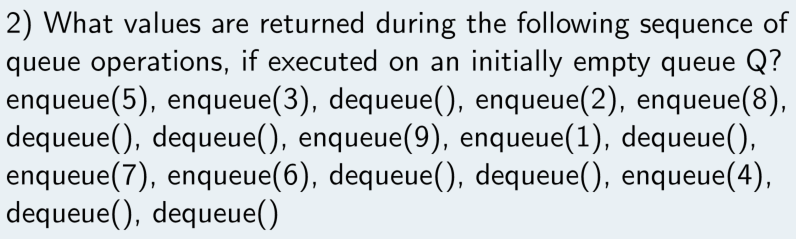

In [121]:
q = Queue()
queue_returned = [
    q.enqueue(5),
    q.enqueue(3),
    q.dequeue(),
    q.enqueue(2),
    q.enqueue(8),
    q.dequeue(),
    q.dequeue(),
    q.enqueue(9),
    q.enqueue(1),
    q.dequeue(),
    q.enqueue(7),
    q.enqueue(6),
    q.dequeue(),
    q.dequeue(),
    q.enqueue(4),
    q.dequeue(),
    q.dequeue(),
]

print("Returned Values:", queue_returned)

Returned Values: [5, 3, 5, 2, 8, 3, 2, 9, 1, 8, 7, 6, 9, 1, 4, 7, 6]


### Part III Question 3
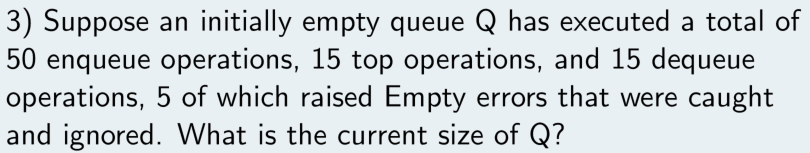

In [154]:
# part III question 3
q_3 = Queue()

for i in range(5):
    q_3.dequeue()

for i in range(50):
    q_3.enqueue(i)

for i in range(15):
    q_3.top()

for i in range(10):
    q_3.dequeue()

print("\nCurrent Size:", q_3.get_size())

Queue is empty
Queue is empty
Queue is empty
Queue is empty
Queue is empty

Current Size: 40


## Stacks & Queues using Linked Lists
I have implemented both the Stack & Queue data structures using linked lists to store the values below.

In [167]:
class StackLL:
    def __init__(self):
        self.Stack = myLinkedList()
        self.size = 0

    def push(self, data):
        """
        Push an element to the top of the stack
        """
        self.Stack.add_first(data)
        self.size += 1
        return data

    def pop(self):
        """
        Remove an element from the stack and return its value
        """
        if self.is_empty():
            print("Stack is empty")
        else:
            popped_val = self.Stack.remove_first()
            self.size -= 1
            return popped_val
    
    def top(self):
        """
        Return the value of the first element in the stack
        """
        if self.is_empty():
            print("Stack is empty")
        else:
            return self.Stack.head.data
        
    def is_empty(self):
        """
        Return true if stack is empty else false
        """
        return self.size == 0

    def get_size(self):
        """
        Return the current size of the stack
        """
        return self.size

In [156]:
class TestStackLL(unittest.TestCase):
    def test_push(self):
        s = StackLL()
        s.push(1)
        self.assertEqual(s.Stack.to_list(), [1])

    def test_push_2(self):
        s = StackLL()
        s.push(1)
        self.assertEqual(s.Stack.to_list(), [1])
        
    def test_pop(self):
        s = StackLL()
        s.push(1)
        s.pop()
        self.assertEqual(s.Stack.to_list(), [])
        
    def test_pop_2(self):
        s = StackLL()
        s.push(1)
        s.push(1)
        s.pop()
        self.assertEqual(s.Stack.to_list(), [1])
        
    def test_top(self):
        s = StackLL()
        s.push(1)
        top_val = s.top()
        self.assertEqual(top_val, 1)

    def test_top_2(self):
        s = StackLL()
        s.push(1)
        s.push(2)
        top_val = s.top()
        self.assertEqual(top_val, 2)
        
    def test_is_empty(self):
        s = StackLL()
        is_empty = s.is_empty()
        self.assertEqual(is_empty, True)
        
    def test_is_empty_2(self):
        s = StackLL()
        s.push(1)
        is_empty = s.is_empty()
        self.assertEqual(is_empty, False)
        
    def test_get_size(self):
        s = StackLL()
        s.push(1)
        self.assertEqual(s.get_size(), 1)

    def test_get_size_2(self):
        s = StackLL()
        self.assertEqual(s.get_size(), 0)

In [157]:
stack_suite = unittest.TestLoader().loadTestsFromTestCase(TestStackLL)
unittest.TextTestRunner(verbosity=4,stream=sys.stderr).run(stack_suite)

test_get_size (__main__.TestStackLL) ... ok
test_get_size_2 (__main__.TestStackLL) ... ok
test_is_empty (__main__.TestStackLL) ... ok
test_is_empty_2 (__main__.TestStackLL) ... ok
test_pop (__main__.TestStackLL) ... ok
test_pop_2 (__main__.TestStackLL) ... ok
test_push (__main__.TestStackLL) ... ok
test_push_2 (__main__.TestStackLL) ... ok
test_top (__main__.TestStackLL) ... ok
test_top_2 (__main__.TestStackLL) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.033s

OK


<unittest.runner.TextTestResult run=10 errors=0 failures=0>

In [165]:
q = QueueLL()
q.top()

AttributeError: 'NoneType' object has no attribute 'data'

In [166]:
class QueueLL:
    def __init__(self):
        self.queue = myLinkedList()
        self.size = 0
        
    def enqueue(self, data):
        """
        Add element to the end of the queue
        """
        self.queue.add_last(data)
        self.size += 1
        return data
    
    def dequeue(self):
        """
        Remove element from the start of the queue and return its value
        """
        if self.is_empty():
            print("Queue is empty")
        else:
            return_val = self.queue.tail
            self.queue.remove_first()
            self.size -= 1
            return return_val
        
    def top(self):
        """
        Return the value of the element at the front of the queue
        """
        if self.is_empty():
            print("Queue is empty")
        else:
            return self.queue.tail.data
    
    def is_empty(self):
        """
        Return true if queue is empty else false
        """
        return self.size == 0

    def get_size(self):
        """
        Return the current size of the queue
        """
        return self.size

In [163]:
class TestQueueLL(unittest.TestCase):
    def test_enqueue(self):
        q = QueueLL()
        q.enqueue(1)
        self.assertEqual(q.queue.to_list(), [1])

    def test_enqueue_2(self):
        q = QueueLL()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.queue.to_list(), [1, 2])    
    
    def test_dequeue(self):
        q = QueueLL()
        q.enqueue(1)
        q.dequeue()
        self.assertEqual(q.queue.to_list(), [])
        
    def test_dequeue_2(self):
        q = QueueLL()
        q.enqueue(1)
        q.enqueue(2)
        q.dequeue()
        self.assertEqual(q.queue.to_list(), [2])
        
    def test_top(self):
        q = QueueLL()
        q.enqueue(1)
        self.assertEqual(q.top(), 1)
        
    def test_top_2(self):
        q = QueueLL()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.top(), 2)
        
    def test_is_empty(self):
        q = QueueLL()
        q.enqueue(1)
        q.enqueue(2)
        self.assertEqual(q.is_empty(), False)
        
    def test_is_empty_2(self):
        q = QueueLL()
        q.enqueue(1)
        q.dequeue()
        self.assertEqual(q.is_empty(), True)
        
    def test_get_size(self):
        q = QueueLL()
        q.enqueue(1)
        self.assertEqual(q.get_size(), 1)

    def test_get_size_2(self):
        q = QueueLL()
        self.assertEqual(q.get_size(), 0)

In [164]:
queue_suite = unittest.TestLoader().loadTestsFromTestCase(TestQueueLL)
unittest.TextTestRunner(verbosity=4,stream=sys.stderr).run(queue_suite)

test_dequeue (__main__.TestQueueLL) ... ok
test_dequeue_2 (__main__.TestQueueLL) ... ok
test_enqueue (__main__.TestQueueLL) ... ok
test_enqueue_2 (__main__.TestQueueLL) ... ok
test_get_size (__main__.TestQueueLL) ... ok
test_get_size_2 (__main__.TestQueueLL) ... ok
test_is_empty (__main__.TestQueueLL) ... ok
test_is_empty_2 (__main__.TestQueueLL) ... ok
test_top (__main__.TestQueueLL) ... ok
test_top_2 (__main__.TestQueueLL) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.019s

OK


<unittest.runner.TextTestResult run=10 errors=0 failures=0>

## Running Time Testing
Below you will find code used to time each of the data structures add and remove methods. We then compare each of their implementations i.e. array vs linked list.

In [66]:
def timer_func(number_of_elements=2500, number_of_iterations=100):
    """
    Time each of created data structures and store in dataframes 
    for future analysis
    """
    add_dataframes = {}
    remove_dataframes = {}
    add_methods = ["add_first", "add_last", "push", "enqueue", "push", "enqueue"]
    remove_methods = ["remove_first", "remove_last", "pop", "dequeue", "pop", "dequeue"]

    inputs = [1] * 6
    count = 0
    for class_name in [myLinkedList, myLinkedList, Stack, Queue, StackLL, QueueLL]:
        temp = class_name()
        str_class_name =  temp.__class__.__name__
        add_dataframes[str_class_name + " | " + add_methods[count]] = pd.DataFrame(index=range(0,number_of_iterations), columns=range(0,number_of_elements))
        remove_dataframes[str_class_name + " | " + remove_methods[count]] = pd.DataFrame(index=range(0,number_of_iterations), columns=range(0,number_of_elements))
        for i in range(number_of_iterations):
            range_number_of_elements = np.arange(number_of_elements).tolist()
            add_times=[]
            remove_times=[]
            test = class_name()
            for x in range_number_of_elements:
                start_time = timer()
                for num in range(x):
                    method = getattr(test, add_methods[count])
                    method(inputs[count])
                elapsed_time = timer() - start_time
                add_times.append(elapsed_time)
                start_time = timer()
                for num in range(x):
                    method = getattr(test, remove_methods[count])
                    method()
                elapsed_time = timer() - start_time
                remove_times.append(elapsed_time)
            add_dataframes[str_class_name + " | " + add_methods[count]].loc[i] = add_times
            remove_dataframes[str_class_name + " | " + remove_methods[count]].loc[i] = remove_times
        count += 1
    return add_dataframes, remove_dataframes

In [93]:
# time the data structures and save to variables
add_dataframes, remove_dataframes = timer_func(100, 50)

In [113]:
def get_plots(add_data, remove_data, types=["LinkedList", "Stack", "Queue"]):
    """
    Plots the data for the various remove element methods
    """
    for add_remove in ["adding to", "removing from"]:
        for classtype in types:
            fig = plt.figure(figsize=(16, 9))
            data = add_data if add_remove == "adding to" else remove_data
            for key, value in data.items():
                if classtype in key:
                    df_clean = value[np.abs(value-value.mean()) <= (3*value.std())]
                    df_clean_mean = df_clean.mean()
                    df_clean_mean = df_clean_mean.div(df_clean_mean.index.to_series(), axis=0)
                    plt.plot(df_clean_mean.index, df_clean_mean, label=key)
                    plt.legend(loc="upper left")
                plt.xlabel('Number of Elements', fontsize=14)
                plt.ylabel('Time in Seconds', fontsize=14)
                plt.title("Average running time of "+ add_remove + " the " + classtype, fontsize=18)
                plt.savefig("images/Average running time of "+ add_remove + " the " + classtype)
                

Below you can view the time comparisons. We are comparing adding to and removing from the data structures. This is done by adding 100 elements to the data structures and then removing all of those elements, while timing each operation. We do this process a number of times and find the average time for each.

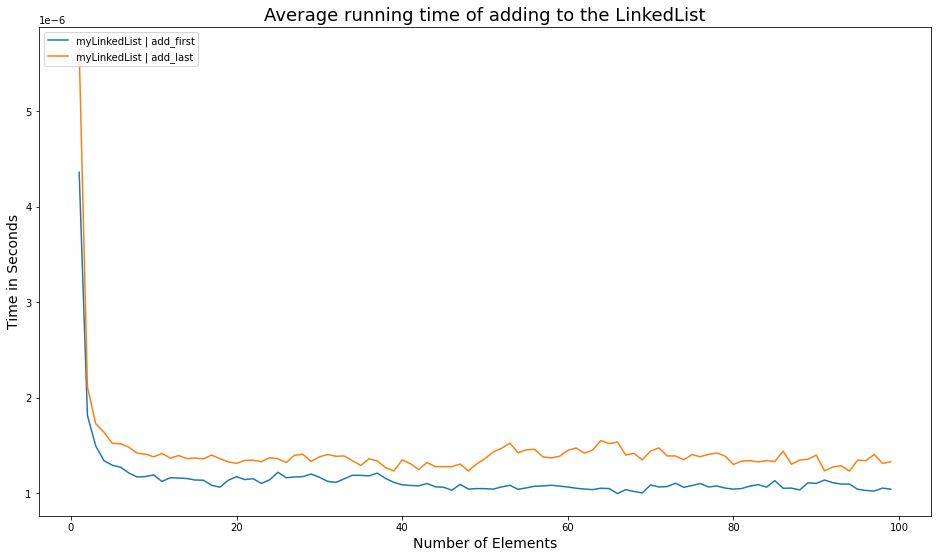

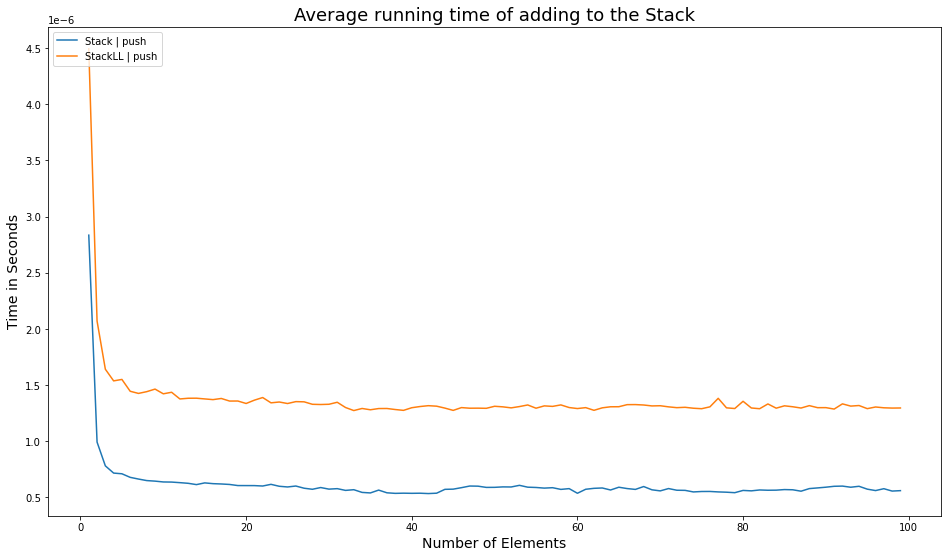

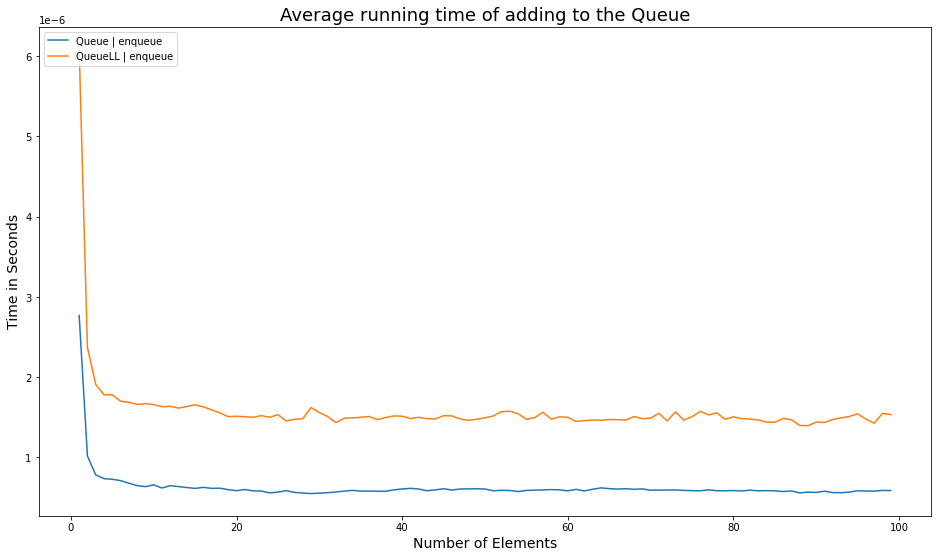

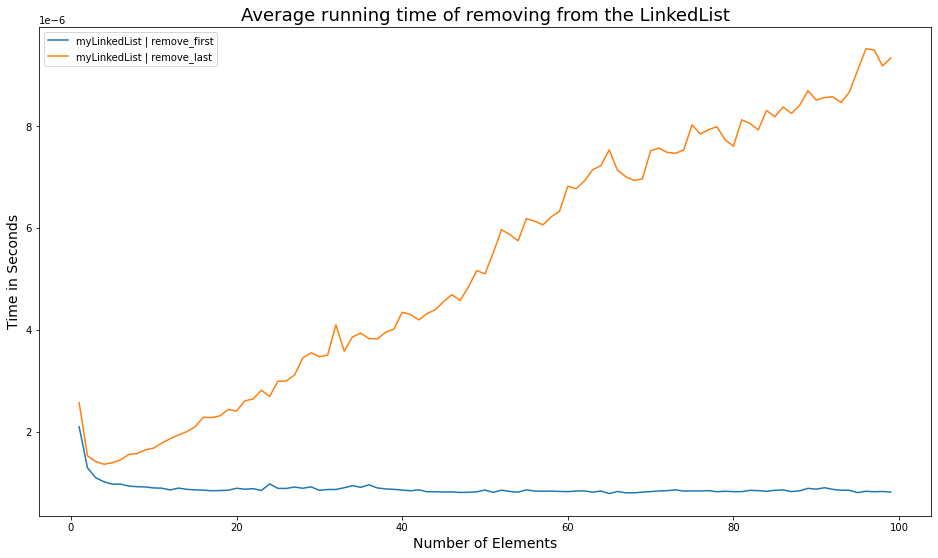

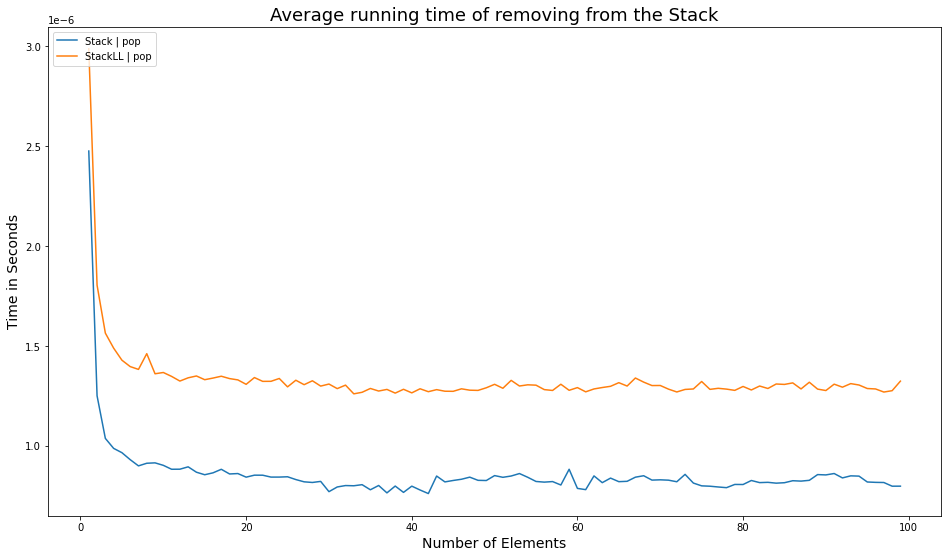

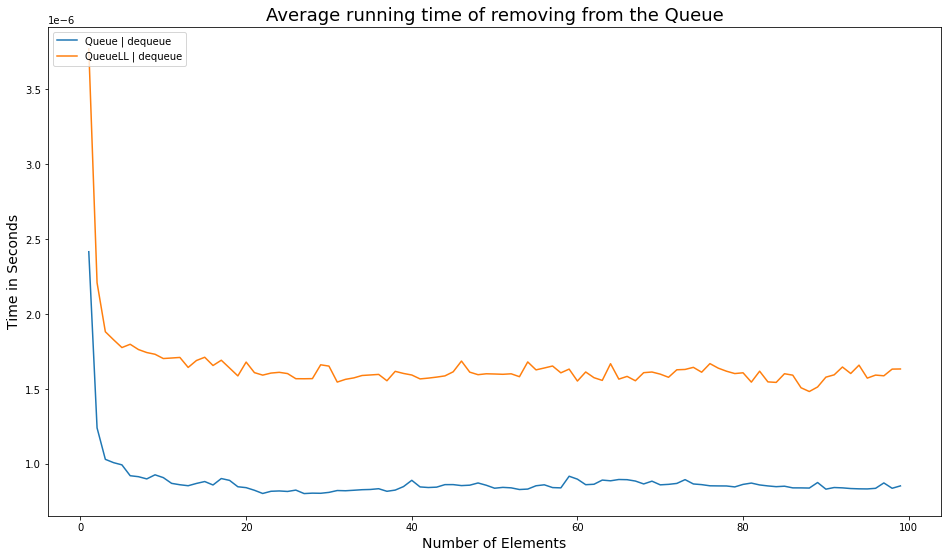

In [114]:
get_plots(add_dataframes, remove_dataframes)